## Modules

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multitest as smt
from fastprogress.fastprogress import  progress_bar
from scipy import stats
import itertools

import _utils

In [2]:
import session_info
session_info.show()

## Read in anndata

In [3]:
adata_vis = _utils.read_visium('/nfs/team205/heart/anndata_objects/8regions/visium-OCT_adult-8reg_raw.h5ad')
category_name = 'annotation_final'
adata_vis

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


AnnData object with n_obs × n_vars = 55049 × 22055
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'n_counts', 'n_genes', 'annotation_JC', 'sangerID', 'Publication', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'region_cell2loc', 'annotation_final', 'Adip1', 'Adip2', 'B', 'B_plasma', 'CD14+Mo', 'CD16+Mo', 'CD4+T_act', 'CD4+T_naive', 'CD8+T_cytox', 'CD8+T_em', 'CD8+T_te', 'CD8+T_trans', 'DC', 'EC10_CMC-like', 'EC1_cap', 'EC2_cap', 'EC3_cap', 'EC4_immune', 'EC5_art', 'EC6_ven', 'EC7_atria', 'EC8_ln', 'FB1', 'FB2', 'FB3', 'FB4', 'FB5', 'FB6', 'ILC', 'LYVE1+IGF1+MP', 'LYVE1+MP_cycling', 'LYVE1+TIMD4+MP', 'MAIT-like', 'Mast', 'MoMP', 'NC1', 'NC2', 'NK_CD16hi', 'NK_CD

## Visualise MSLN abd B_plasma in the epicardium

In [4]:
# palette for the manual annotations
### ver 20220718 ###

colormap='tab20'
palette={}
palette['adipose_tissue']=plt.get_cmap(colormap).colors[0]
palette['endocardium']=plt.get_cmap(colormap).colors[1]
palette['epicardium_subepicardium']=plt.get_cmap(colormap).colors[2]
palette['fibrosis']=plt.get_cmap(colormap).colors[3]
palette['myocardium']=plt.get_cmap(colormap).colors[5]
palette['nerve']=plt.get_cmap(colormap).colors[4]
palette['node']=plt.get_cmap(colormap).colors[6]
palette['vessel']=plt.get_cmap(colormap).colors[7]
palette['AV_bundle']=plt.get_cmap(colormap).colors[8]
palette['myocardium_atrial']=plt.get_cmap(colormap).colors[9]
palette['myocardium_ventricular']=plt.get_cmap(colormap).colors[10]
palette['cardiac_skeleton']=plt.get_cmap(colormap).colors[11]
palette['other_haemorrhage']=plt.get_cmap(colormap).colors[12]

In [5]:
sc.set_figure_params(scanpy=True, fontsize=26, dpi=300)

Trying to set attribute `.uns` of view, copying.
... storing 'annotation_final' as categorical


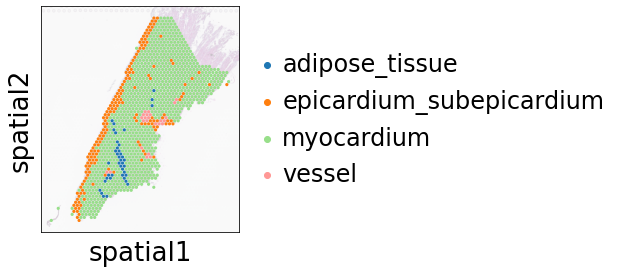

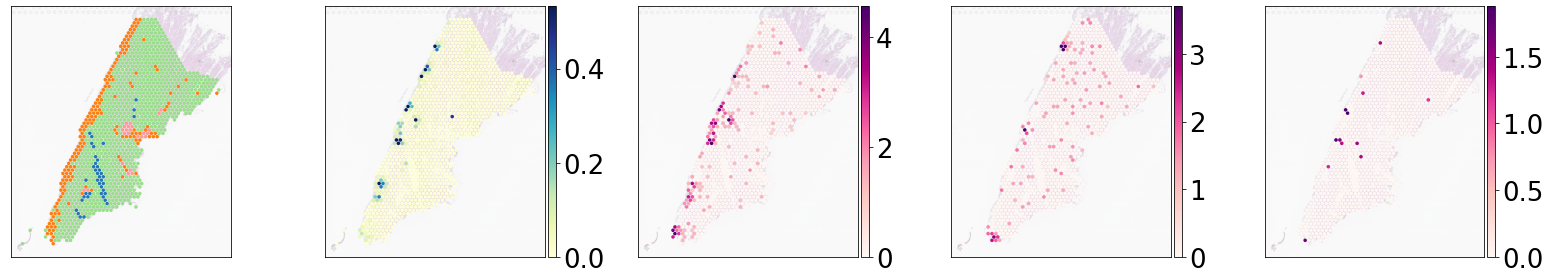

In [6]:
sample = 'HCAHeartST8795940'
slide=_utils.select_multislide(adata_vis,[sample])

sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
             title='',palette=palette)


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22,4))
sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[0],title='',palette=palette)
sc.pl.spatial(slide,cmap='YlGnBu',color=['B_plasma'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[1],title='') # 
sc.pl.spatial(slide,cmap='RdPu',color=['IGHG1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[2],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['IGHA1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[3],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['JCHAIN'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[4],title='')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
plt.tight_layout(w_pad=0.0)

fig.savefig(f'/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/Visium-Bplasma_{sample}.pdf')

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
... storing 'annotation_final' as categorical


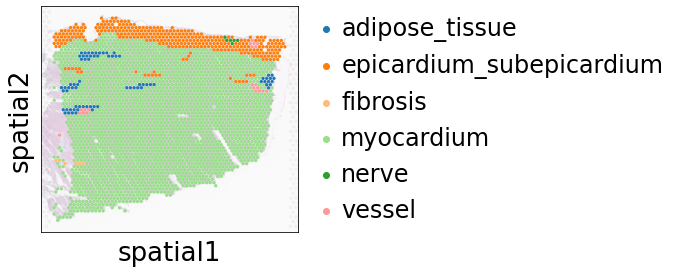

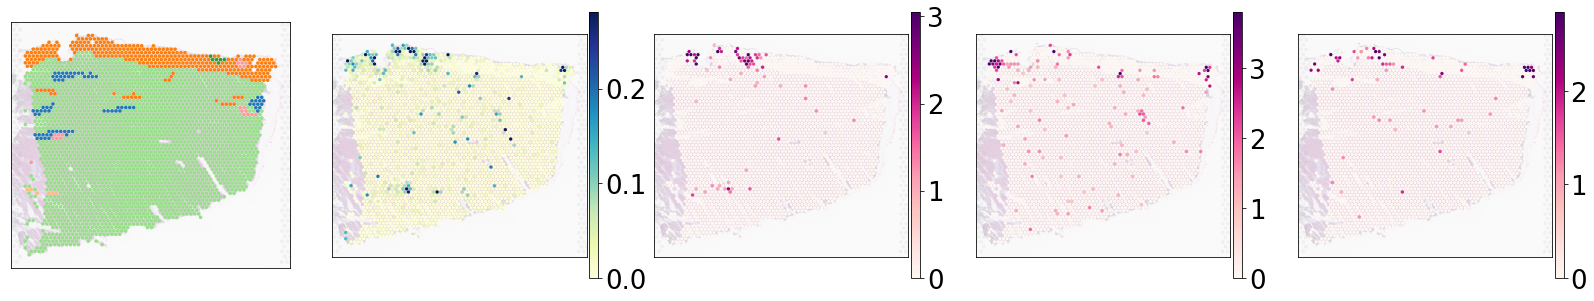

In [7]:
sample = 'HCAHeartST8795933'
slide=_utils.select_multislide(adata_vis,[sample])

sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
             title='',palette=palette,save=f'_Visium-annotation_{sample}.pdf')


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22,4))
sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[0],title='',palette=palette)
sc.pl.spatial(slide,cmap='YlGnBu',color=['B_plasma'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[1],title='') # 
sc.pl.spatial(slide,cmap='RdPu',color=['IGHG1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[2],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['IGHA1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[3],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['JCHAIN'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[4],title='')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
plt.tight_layout(pad=0.000)

fig.savefig(f'/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/Visium-Bplasma_{sample}.pdf')

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
... storing 'annotation_final' as categorical


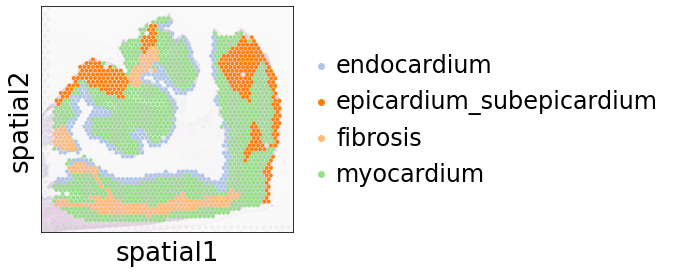

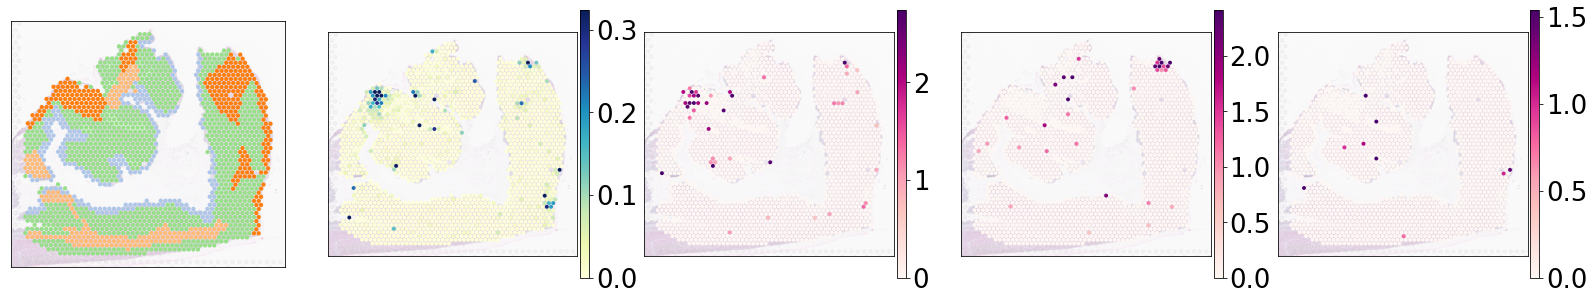

In [8]:
sample = 'HCAHeartST8795934'
slide=_utils.select_multislide(adata_vis,[sample])

sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
             title='',palette=palette)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22,4))
sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[0],title='',palette=palette)
sc.pl.spatial(slide,cmap='YlGnBu',color=['B_plasma'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[1],title='') # 
sc.pl.spatial(slide,cmap='RdPu',color=['IGHG1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[2],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['IGHA1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[3],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['JCHAIN'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[4],title='')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
plt.tight_layout(pad=0.000)

fig.savefig(f'/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/Visium-Bplasma_{sample}.pdf')

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
... storing 'annotation_final' as categorical


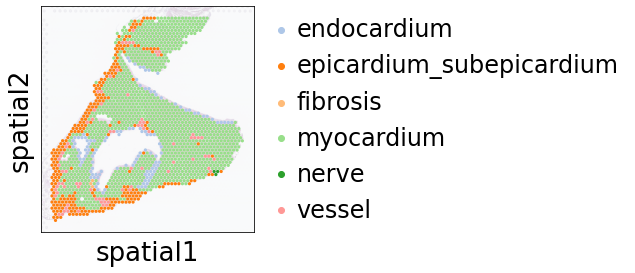

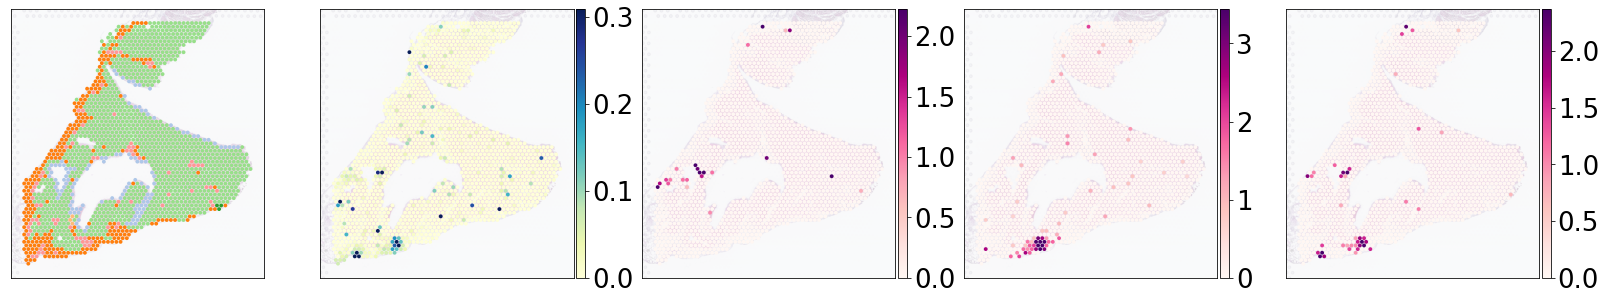

In [9]:
sample = 'HCAHeartST10238252'
slide=_utils.select_multislide(adata_vis,[sample])

sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
             title='',palette=palette,save=f'_Visium-annotation_{sample}.pdf')

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22,4))
sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[0],title='',palette=palette)
sc.pl.spatial(slide,cmap='YlGnBu',color=['B_plasma'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[1],title='') # 
sc.pl.spatial(slide,cmap='RdPu',color=['IGHG1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[2],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['IGHA1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[3],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['JCHAIN'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[4],title='')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
plt.tight_layout(pad=0.000)

fig.savefig(f'/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/figures/Visium-Bplasma_{sample}.pdf')

/home/jovyan/my-conda-envs/cellpymc/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Trying to set attribute `.uns` of view, copying.
... storing 'annotation_final' as categorical


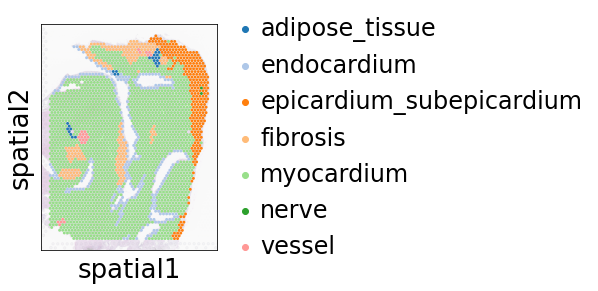

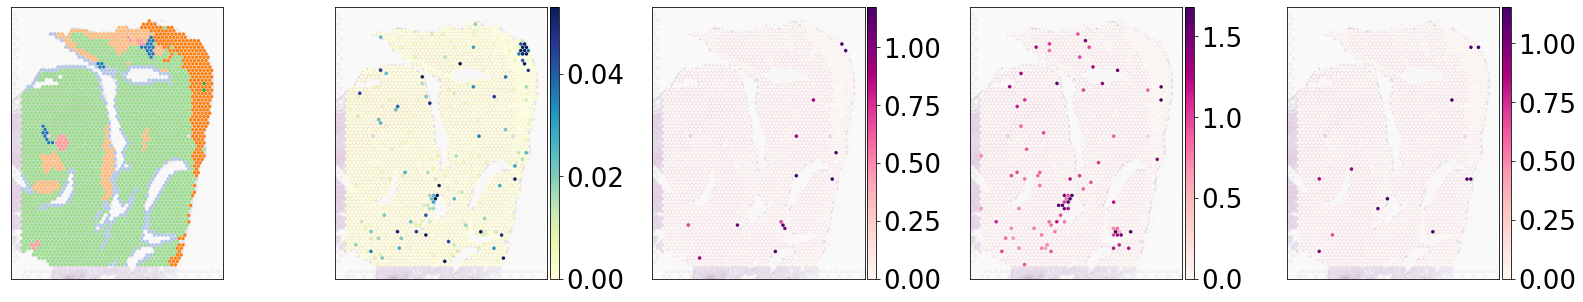

In [12]:
sample= 'HCAHeartST8795937'
slide=_utils.select_multislide(adata_vis,[sample])

sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',
             title='',palette=palette)

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(22,4))
sc.pl.spatial(slide,cmap='RdPu',color='annotation_final', ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[0],title='',palette=palette)
sc.pl.spatial(slide,cmap='YlGnBu',color=['B_plasma'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.4',legend_loc=None,
             show=False,ax=axs[1],title='') # 
sc.pl.spatial(slide,cmap='RdPu',color=['IGHG1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[2],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['IGHA1'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[3],title='')
sc.pl.spatial(slide,cmap='RdPu',color=['JCHAIN'], ncols=5, wspace=0,
              size=1.4,img_key='hires',alpha_img=0.3,vmin=0, vmax='p99.8',legend_loc=None,
             show=False,ax=axs[4],title='')
axs[0].set_ylabel('')
axs[0].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xlabel('')
axs[3].set_ylabel('')
axs[3].set_xlabel('')
axs[4].set_ylabel('')
axs[4].set_xlabel('')
plt.tight_layout(pad=0.000)